In [ ]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import cufflinks as cf
import tensorflow
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Ecommerce Sentiment Analysis/Dataset/English Dataset.xlsx')

In [ ]:
df.columns=["Comments","sentiment"]

In [ ]:
df.head()

,Comments,sentiment
0,This product is not good.,Negative
1,100% Authentic Product,Positive
2,There is a 5 year warranty!,Positive
3,Excellent service from Picabo.,Positive
4,There is no doubt about the pierit.,Positive


In [ ]:
df["sentiment"].unique()

array(['Negative', 'Positive'], dtype=object)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(2577, 2)

In [ ]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.sentiment =='Negative']),
      "\nTotal Positive :",len(df[df.sentiment=='Positive']))

Total Comment: 2577 
Total Negative : 1138 
Total Positive : 1439


In [ ]:
import os

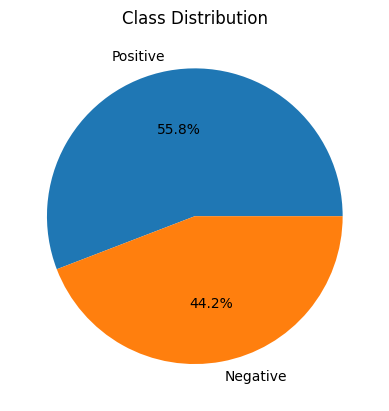

In [ ]:
class_counts = df['sentiment'].value_counts()
class_percents = class_counts / class_counts.sum() * 100
# Plot the pie chart
plt.pie(class_percents, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.savefig("my_plot.png")
plt.show()

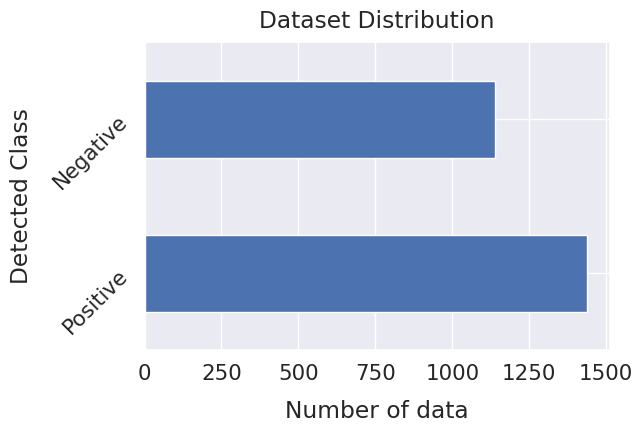

In [ ]:
sns.set(font_scale=1.4)
df['sentiment'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of data", labelpad=12)
plt.ylabel("Detected Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);
plt.savefig("Dataset Distribution BarChart.png")

# **Data Preperation and Cleaning**

In [ ]:
df["Lower_Case"] = df["Comments"].str.lower()
df.head()

,Comments,sentiment,Lower_Case
0,This product is not good.,Negative,this product is not good.
1,100% Authentic Product,Positive,100% authentic product
2,There is a 5 year warranty!,Positive,there is a 5 year warranty!
3,Excellent service from Picabo.,Positive,excellent service from picabo.
4,There is no doubt about the pierit.,Positive,there is no doubt about the pierit.


# **Removing Duplicate Rows**

In [ ]:
# df.drop_duplicates(inplace=True)

# **Stopwords Removal**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)


    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df["Lower_Case"]=df["Lower_Case"].astype(str)

In [ ]:
df['Stopwords']=df['Lower_Case'].apply(process_text)

In [ ]:
df.dtypes

Comments      object
sentiment     object
Lower_Case    object
Stopwords     object
dtype: object

In [ ]:
df['Stopwords']=df['Lower_Case'].apply(process_text)

In [ ]:
df

,Comments,sentiment,Lower_Case,Stopwords
0,This product is not good.,Negative,this product is not good.,product good
1,100% Authentic Product,Positive,100% authentic product,100 authentic product
2,There is a 5 year warranty!,Positive,there is a 5 year warranty!,5 year warranty
3,Excellent service from Picabo.,Positive,excellent service from picabo.,excellent service picabo
4,There is no doubt about the pierit.,Positive,there is no doubt about the pierit.,doubt pierit
...,...,...,...,...
2572,"The headphone is really awesome, a lot of beau...",Positive,"the headphone is really awesome, a lot of beau...",headphone really awesome lot beautiful sound s...
2573,The quality of the headphones is not good at t...,Negative,the quality of the headphones is not good at t...,quality headphones good price range
2574,"Best for Heavy Gaming, Camera is also much better",Positive,"best for heavy gaming, camera is also much better",best heavy gaming camera also much better
2575,Yes happy good status,Positive,yes happy good status,yes happy good status


# **Removing Small Texts**

In [ ]:
df['length'] = df['Stopwords'].apply(lambda x:len(x.split()))

dataset = df.loc[df.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

dataset['no_char'] = df['Stopwords'].apply(lambda cleaned: len(cleaned))

After Cleaning: 
Removed 0 Small conversations 
Total conversations: 2577


In [ ]:
  dataset

,Comments,sentiment,Lower_Case,Stopwords,length,no_char
0,This product is not good.,Negative,this product is not good.,product good,2,12
1,100% Authentic Product,Positive,100% authentic product,100 authentic product,3,21
2,There is a 5 year warranty!,Positive,there is a 5 year warranty!,5 year warranty,3,15
3,Excellent service from Picabo.,Positive,excellent service from picabo.,excellent service picabo,3,24
4,There is no doubt about the pierit.,Positive,there is no doubt about the pierit.,doubt pierit,2,12
...,...,...,...,...,...,...
2572,"The headphone is really awesome, a lot of beau...",Positive,"the headphone is really awesome, a lot of beau...",headphone really awesome lot beautiful sound s...,14,92
2573,The quality of the headphones is not good at t...,Negative,the quality of the headphones is not good at t...,quality headphones good price range,5,35
2574,"Best for Heavy Gaming, Camera is also much better",Positive,"best for heavy gaming, camera is also much better",best heavy gaming camera also much better,7,41
2575,Yes happy good status,Positive,yes happy good status,yes happy good status,4,21


# **Stemming**

In [ ]:
import nltk
from nltk.stem import LancasterStemmer

nltk.download('lancaster')

[nltk_data] Error loading lancaster: Package 'lancaster' not found in
[nltk_data]     index


False

In [ ]:
from nltk.stem import LancasterStemmer, PorterStemmer
import pandas as pd

# Instantiate stemmers
lancaster_stemmer = LancasterStemmer()
porter_stemmer = PorterStemmer()

# Define stemming functions
def lancaster_stemming(text):
    return ' '.join([lancaster_stemmer.stem(word) for word in text.split()])

def porter_stemming(text):
    return ' '.join([porter_stemmer.stem(word) for word in text.split()])

# Apply stemming to the dataset
dataset['LancasterStemming'] = dataset['Stopwords'].apply(lancaster_stemming)
dataset['PorterStemming'] = dataset['Stopwords'].apply(porter_stemming)

# Compare the performances
comparison_df = pd.DataFrame({
    'Original Text': dataset['Stopwords'],
    'Lancaster Stemming': dataset['LancasterStemming'],
    'Porter Stemming': dataset['PorterStemming']
})

In [ ]:
comparison_df.head(20)

,Original Text,Lancaster Stemming,Porter Stemming
0,product good,produc good,product good
1,100 authentic product,100 auth produc,100 authent product
2,5 year warranty,5 year warranty,5 year warranti
3,excellent service picabo,excel serv picabo,excel servic picabo
4,doubt pierit,doubt pierit,doubt pierit
5,holes many spots shirts,hol many spot shirt,hole mani spot shirt
6,havent received order yet,hav receiv ord yet,havent receiv order yet
7,outstanding beat great sound,outstand beat gre sound,outstand beat great sound
8,perfumes original,perfum origin,perfum origin
9,negative impact company,neg impact company,neg impact compani


In [ ]:
dataset.head()

,Comments,sentiment,Lower_Case,Stopwords,length,no_char,LancasterStemming,PorterStemming
0,This product is not good.,Negative,this product is not good.,product good,2,12,produc good,product good
1,100% Authentic Product,Positive,100% authentic product,100 authentic product,3,21,100 auth produc,100 authent product
2,There is a 5 year warranty!,Positive,there is a 5 year warranty!,5 year warranty,3,15,5 year warranty,5 year warranti
3,Excellent service from Picabo.,Positive,excellent service from picabo.,excellent service picabo,3,24,excel serv picabo,excel servic picabo
4,There is no doubt about the pierit.,Positive,there is no doubt about the pierit.,doubt pierit,2,12,doubt pierit,doubt pierit


In [ ]:
dataset.drop(["Comments","Lower_Case","Stopwords","LancasterStemming"],axis=1,inplace=True)

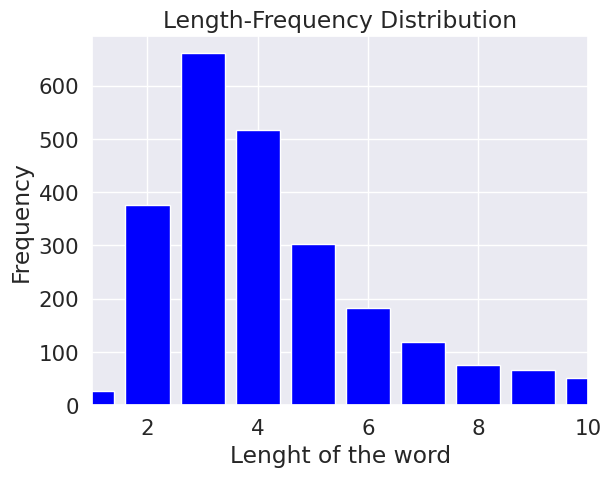

Maximum Length of a comment: 62
Minimum Length of a comment: 1
Average Length of a comment: 5.0


In [ ]:
frequency = dict()
for i in dataset.length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="blue")
plt.xlim(1, 10)

plt.xlabel('Lenght of the word')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a comment: {max(dataset.length)}")
print(f"Minimum Length of a comment: {min(dataset.length)}")
print(f"Average Length of a comment: {round(np.mean(dataset.length),0)}")

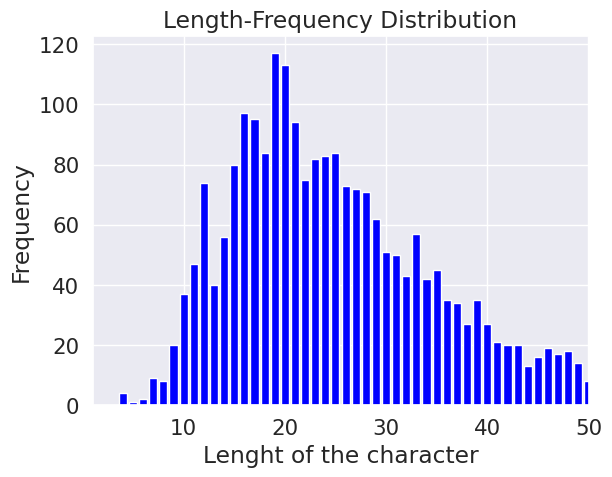

Maximum Length of a comment: 402
Minimum Length of a comment: 4
Average Length of a comment: 33.0


<Figure size 640x480 with 0 Axes>

In [ ]:
frequency = dict()
for i in dataset.no_char:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="blue")
plt.xlim(1, 50)

plt.xlabel('Lenght of the character')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a comment: {max(dataset.no_char)}")
print(f"Minimum Length of a comment: {min(dataset.no_char)}")
print(f"Average Length of a comment: {round(np.mean(dataset.no_char),0)}")
plt.savefig("Character Frequency Distribution Bangla BarChart.png")

In [ ]:
dataset.drop(["length","no_char"],axis=1,inplace=True)

In [ ]:
dataset.head()

,sentiment,PorterStemming
0,Negative,product good
1,Positive,100 authent product
2,Positive,5 year warranti
3,Positive,excel servic picabo
4,Positive,doubt pierit


In [ ]:
dataset.columns=["sentiment","cleaned"]

# **Data Set Summary**

In [ ]:
def data_summary(dataset):
    documents = []
    words = []
    most_frequent_word =[]
    u_words = []

    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.sentiment.value_counts().to_dict().items()]

    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.sentiment==label].cleaned) for word in t.strip().split()]

        counts = dict()

        for word in word_list:
                counts[word] = counts.get(word, 0)+1

        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)

        documents.append(len(list(dataset[dataset.sentiment==label].cleaned)))

        words.append(len(word_list))

        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of comments:{}".format(len(list(dataset[dataset.sentiment==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:15]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

documents,words,u_words,class_names = data_summary(dataset)


Class Name :  Positive
Number of comments:1439
Number of Words:7557
Number of Unique Words:1158
Most Frequent Words:

good	510
product	409
price	260
qualiti	199
thank	182
got	133
seller	117
want	99
better	95
beauti	86
take	83
much	82
like	82
alhamdulillah	82
give	74

Class Name :  Negative
Number of comments:1138
Number of Words:5465
Number of Unique Words:1187
Most Frequent Words:

product	276
qualiti	184
bad	146
good	145
one	74
buy	72
cloth	70
daraj	70
give	68
order	63
price	56
wast	54
color	52
money	51
pictur	48
Total Number of Unique Words:1772


***New Dataframe for Data Summary***

In [ ]:
data_matrix = pd.DataFrame({'Total comments':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
data = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")

In [ ]:
data

,Class Names,Category,Values
0,Positive,Total comments,1439
1,Negative,Total comments,1138
2,Positive,Total Words,7557
3,Negative,Total Words,5465
4,Positive,Unique Words,1158
5,Negative,Unique Words,1187


***Data Summary Visualization***

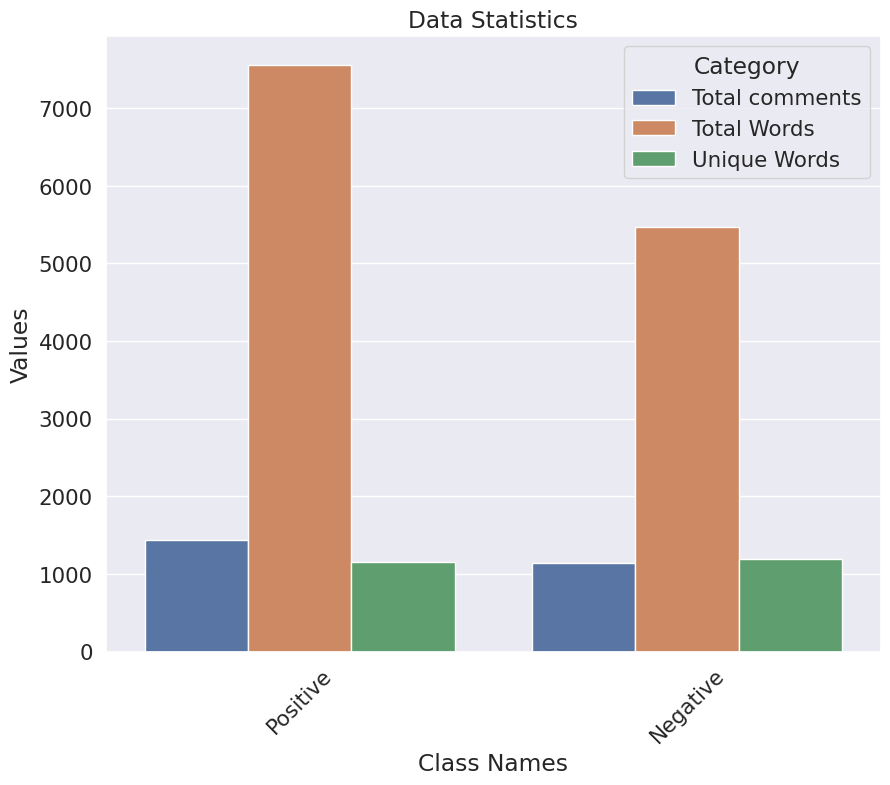

In [ ]:
plt.figure(figsize=(10, 8))
ax = plt.subplot()

sns.barplot(data=data,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

plt.savefig("Data Statistics Bangla BarChart.png")

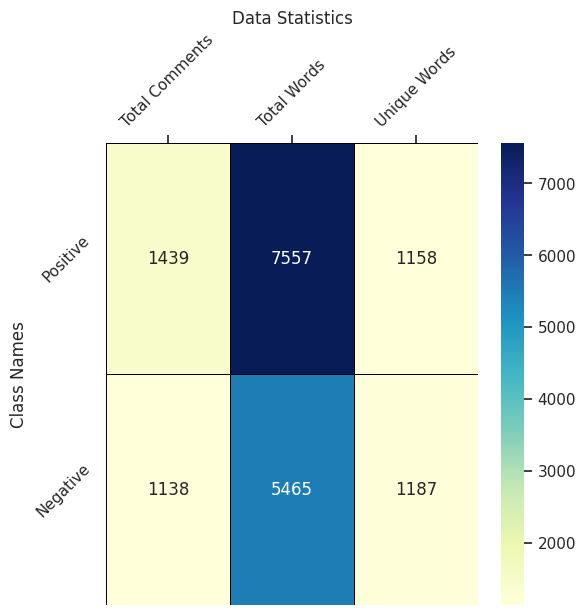

In [ ]:
sns.set()
plt.figure(figsize =(6, 6))
ax = plt.subplot()
sns.heatmap(data_matrix.iloc[:,0:3], annot=True,fmt="d", linewidths=0.5,linecolor = 'Black',cmap = "YlGnBu",ax = ax)

ax.set_ylabel('Class Names')
ax.set_title('Data Statistics')
y_label = ["Total Comments", "Total Words", "Unique Words"]
ax.xaxis.set_ticklabels(y_label, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
ax.xaxis.tick_top()
plt.savefig("Data Statistics Bangla.png")

In [ ]:
def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels)
    class_names =le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels


In [ ]:
def dataset_split(feature_space,sentiment):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test

In [ ]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

In [ ]:
dataset.head()

,sentiment,cleaned
0,Negative,product good
1,Positive,100 authent product
2,Positive,5 year warranti
3,Positive,excel servic picabo
4,Positive,doubt pierit


In [ ]:
def calc_gram_tfidf(Conversations):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(Conversations)

    return tfidf,X

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
def ml_models_defination():

    lr_model = LogisticRegression()
    dt_model = DecisionTreeClassifier()
    rf_model = RandomForestClassifier()
    mnb_model = MultinomialNB(alpha=0.12)
    knn_model = KNeighborsClassifier(n_neighbors=3)
    svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
    sgd_model = SGDClassifier(loss = 'log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','SVM','sgd']

    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,svm_model,sgd_model]

    return ml_models,model_names

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_performance(model, X_train, X_test, y_train, y_test):

    my_dict = {}
    model.fit(X_train, y_train)

    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y), 4) * 100
    my_dict['Precision'] = round(precision_score(y_test, pred_y, pos_label=1), 4) * 100
    my_dict['Recall'] = round(recall_score(y_test, pred_y, pos_label=1), 4) * 100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y, pos_label=1), 4) * 100
    return my_dict


In [ ]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []

    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    model_names = ['Logistic Regression','Decision Tree','Random Forest','Multi. Naive Bayes','KNN','SVM','SGD']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,'Model Name':model_names })
    return performance_df

In [ ]:
x = ["I got from you inactive products that are very unexpected"]

def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

get_top_n_words(x,3)

[('got', 1), ('from', 1), ('you', 1)]

In [ ]:
y = ["I got from you inactive products that are very unexpected"]
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(y,3)

[('got from', 1), ('from you', 1), ('you inactive', 1)]

In [ ]:
z = ["I got from you inactive products that are very unexpected"]
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(z,3)

[('got from you', 1), ('from you inactive', 1), ('you inactive products', 1)]

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]

for i,gram in enumerate(ngrams):
     tfidf,feature = calc_gram_tfidf(dataset.cleaned)
     labels = label_encoding(dataset.sentiment,False)
     X_train,X_test,y_train,y_test = dataset_split(feature,labels)
     ml_models,model_names = ml_models_defination()
     accuracy = {f'{model_names[j]}': model_performance(model, X_train, X_test, y_train, y_test) for j, model in enumerate(ml_models)}

     with open(f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy,f)

Feature Size :======> 15922

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2577 
	Training		 2061 
	Test			 516
Feature Size :======> 15922

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2577 
	Training		 2061 
	Test			 516
Feature Size :======> 15922

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2577 
	Training		 2061 
	Test			 516


In [ ]:
table = performance_table(accuracy)
df3 =pd.DataFrame(table)
table

,Accuracy,Precision,Recall,F1 Score,Model Name
0,81.20,77.64,91.79,84.12,Logistic Regression
1,78.88,80.00,81.43,80.71,Decision Tree
2,82.36,83.16,84.64,83.89,Random Forest
3,81.59,81.79,85.00,83.36,Multi. Naive Bayes
4,75.00,74.92,81.07,77.87,KNN
5,82.56,82.09,86.79,84.37,SVM
6,81.40,79.87,87.86,83.67,SGD


In [ ]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by 5 at = 82.56
Highest F1-Score achieved by 5 at = 84.37
Highest Precision Score achieved by 2 at = 83.16
Highest Recall Score achieved by 0 at = 91.79


In [ ]:
svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
svm_model.fit(X_train, y_train)
svm_model.score(X_test,y_test)

0.8255813953488372

In [ ]:
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)

[[183  53]
 [ 37 243]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       236
           1       0.82      0.87      0.84       280

    accuracy                           0.83       516
   macro avg       0.83      0.82      0.82       516
weighted avg       0.83      0.83      0.82       516



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
categories  = ['Negative','Positive']
group_names = ['True Negative','False Positive', 'False Negative','True Postive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

In [ ]:
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

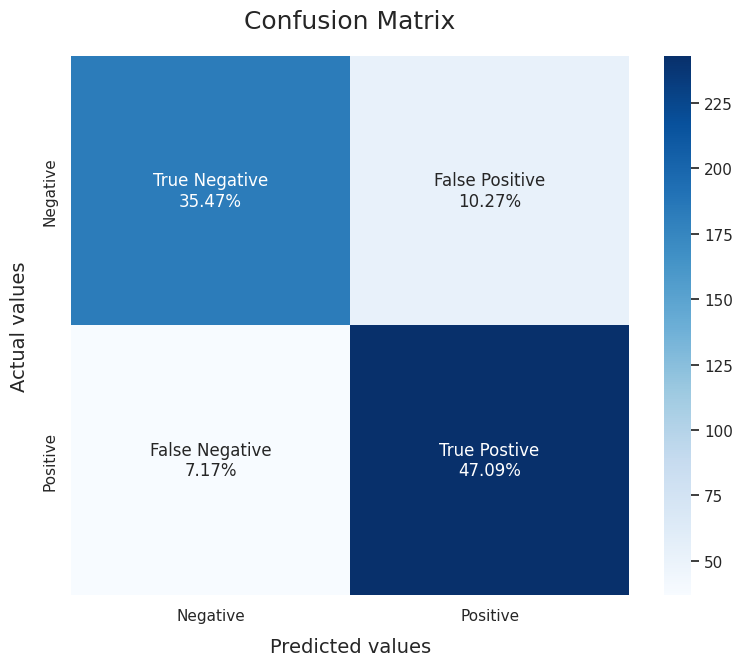

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.savefig("Confusion Matrix Bangla.png")

<Axes: >

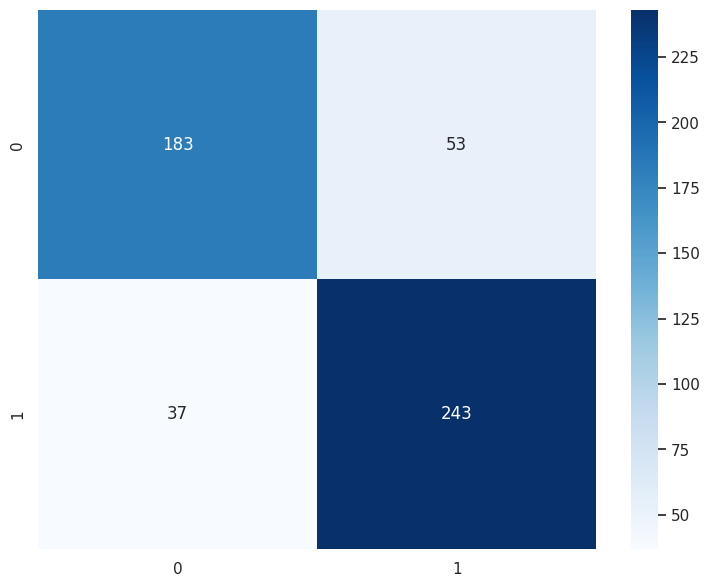

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(cf_matrix,cmap='Blues', annot=True,fmt='d')

In [ ]:
import pickle
file = open('cs_svm.pkl', 'wb')
pickle.dump(svm_model, file)

In [ ]:
model = open('cs_svm.pkl','rb')
svm_model = pickle.load(model)
Comment =  'bad product'
processed_conversation = process_text(Comment)
if (len(processed_conversation))>0:
    cv,feature_vector = calc_gram_tfidf(dataset.cleaned)
    feature = cv.transform([processed_conversation]).toarray()
    Result = svm_model.predict(feature)
    if (Result == 0):
        print(f"Negative")
    else:
        print(f"Positive")
else:
    print("This conversation doesn't contains any bengali Words")

Negative
